# **An Analysis of Asian American Quality of Life**

**Author: Valerie Tseng**

In this notebook I'll be:

1. Uploading my data file and preparing the data for analysis
2. Initial analysis and exploration, including visualizing the data

## Part 1: Uploading and preparing data file

In [1]:
import pandas as pd

In [22]:
#load csv file into dataframe
entire_df = pd.read_csv('Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_.csv')

In [23]:
#create list of relevant columns
my_cols = ['Age', 'Gender', 'Ethnicity', "Marital Status", "Education Completed", "Full Time Employment", "Income", "Achieving Ends Meet", "US Born", "Duration of Residency", "Primary Language", "English Speaking", "English Difficulties", "Familiarity with America", 
"Familiarity with Ethnic Origin", "Identify Ethnically", "Belonging", "Discrimination ", "Present Health", "Present Mental Health", "Comunication Problem", "Satisfaction", "Quality of Life", "Satisfied With Life 1", "Satisfied With Life 2", 
"See Family", "Close Family", "Helpful Family", "See Friends", "Close Friends", "Helpful Friends", "Family Respect", "Similar Values", "Successful Family", "Trust", "Loyalty", "Family Pride", "Expression", 
"Spend Time Together", "Feel Close ", "Togetherness", "Close-knit Community", "Helpful Community", "Community Shares Values", "Get Along", "Community Trust"]


In [24]:
#filter for relevant columns
df = entire_df[my_cols]

In [25]:
#drop rows that are incomplete 
final_df = df.dropna()

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

In [27]:
#convert all qualitative variables to quantitative

for row in ['Family Respect', 'Similar Values', 'Successful Family', 'Trust', 'Loyalty', 'Family Pride', 'Expression',
           'Spend Time Together', 'Feel Close ', 'Togetherness']:
    final_df[row] = final_df[row].replace({'Strongly disagree': 1, 'Somewhat disagree': 2, 'Somewhat agree': 3, 'Strongly agree':4})


In [28]:
#convert all qualitative variables to quantitative

for row in ['Close-knit Community', 'Helpful Community','Community Shares Values', 'Get Along', 'Community Trust']:
    final_df[row] = final_df[row].replace({'Strongly disagree':1, 'Disagree':2, 'Neutral':3, 'Agree':4, 'Strongly agree':5})
    

In [29]:
#convert all qualitative variables to quantitative

final_df['Gender'] = final_df['Gender'].replace({'Male': 0, 'Female': 1})
final_df['Income'] = final_df['Income'].replace({'$0 - $9,999': 5000, '$10,000 - $19,999': 15000, '$20,000 - $29,999': 25000,
                                                '$30,000 - $39,999': 35000, '$40,000 - $49,999': 45000, '$50,000 - $59,999': 55000,
                                               '$60,000 - $69,999': 65000, '$70,000 and over': 75000 })
final_df['US Born'] = final_df['US Born'].replace({'Yes': 1, 'No': 0})
final_df['Marital Status'] = final_df['Marital Status'].replace({'Married': 1, 'Single':0, 'Other':0, 'Living with a partner':0})
final_df['Full Time Employment'] = final_df['Full Time Employment'].replace({'0': 0, "Employed full time": 1})


In [30]:
#convert all qualitative variables to quantitative

final_df['English Speaking'] = final_df['English Speaking'].replace({'Not at all': 1, 'Not well': 2, 'Well': 3, 'Very well': 4})
final_df['English Difficulties'] = final_df['English Difficulties'].replace({'Not at all': 1, 'Not much': 2, 'Much': 3, 'Very much': 4})
final_df['Familiarity with America'] = final_df['Familiarity with America'].replace({'Very low': 1, "Low": 2, "High": 3, 'Very high': 4})
final_df['Familiarity with Ethnic Origin'] = final_df['Familiarity with Ethnic Origin'].replace({'Very low': 1, "Low": 2, "High": 3, 'Very high': 4})
final_df['Identify Ethnically'] = final_df['Identify Ethnically'].replace({'Not at all': 1, "Not very close": 2, "Somewhat close": 3, 'Very close': 4})
final_df['Belonging'] = final_df['Belonging'].replace({'Not at all': 1, "Not very much": 2, "Somewhat": 3, 'Very much': 4})

In [31]:
#convert all qualitative variables to quantitative

final_df['Present Health'] = final_df['Present Health'].replace({'Poor':1, 'Fair':2, 'Good': 3, 'Very Good': 4, 'Excellent':5})
final_df['Present Mental Health'] = final_df['Present Mental Health'].replace({'Poor':1, 'Fair':2, 'Good': 3, 'Very Good': 4, 'Excellent':5})

final_df['Comunication Problem'] = final_df['Comunication Problem'].replace({'0': 0, 'Yes':1})
final_df['Satisfaction'] = final_df['Satisfaction'].replace({'Not at all': 1, 'Not very much': 2, 'Pretty much': 3, 'Very much':4})
final_df['Satisfied With Life 1'] = final_df['Satisfied With Life 1'].replace({'Strongly disagree':1, 'Disagree':2, 'Slightly disagree':3, 'Neither agree or disagree': 4,
                                                                              'Slightly agree': 5, 'Agree': 6, 'Strongly agree': 7})
final_df['Satisfied With Life 2'] = final_df['Satisfied With Life 2'].replace({'Strongly disagree':1, 'Disagree':2, 'Slightly disagree':3, 'Neither agree or disagree': 4,
                                                                              'Slightly agree': 5, 'Agree': 6, 'Strongly agree': 7})


In [32]:
#use one hot encoding for ethnicity variable
ethnicity_df = final_df.copy()
final_df = pd.get_dummies(final_df, columns = ['Ethnicity'])

In [34]:
final_df

,Age,Gender,Marital Status,Education Completed,Full Time Employment,Income,Achieving Ends Meet,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Comunication Problem,Satisfaction,Quality of Life,Satisfied With Life 1,Satisfied With Life 2,See Family,Close Family,Helpful Family,See Friends,Close Friends,Helpful Friends,Family Respect,Similar Values,Successful Family,Trust,Loyalty,Family Pride,Expression,Spend Time Together,Feel Close,Togetherness,Close-knit Community,Helpful Community,Community Shares Values,Get Along,Community Trust,Ethnicity_Asian Indian,Ethnicity_Chinese,Ethnicity_Filipino,Ethnicity_Korean,Ethnicity_Other,Ethnicity_Vietnamese
29,69.0,0,1,17.0,0,55000,0.0,0,30.0,1.0,3,4,3,3,3,3,1.0,3,4,0,3,7.0,5,5,2.0,2.0,2.0,1.0,1.0,1.0,4,4,3,4,4,4,4,4,4,4,3,3,2,3,3,0,1,0,0,0,0
33,55.0,1,1,12.0,1,35000,0.0,0,30.0,1.0,3,1,3,3,3,3,1.0,2,3,0,3,5.0,4,5,1.0,0.0,2.0,1.0,1.0,1.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,1,0,0,0,0
35,67.0,1,1,16.0,0,5000,0.0,0,3.0,1.0,1,2,2,3,3,3,0.0,2,2,0,3,5.0,4,4,3.0,2.0,3.0,3.0,3.0,3.0,3,3,3,3,3,3,3,3,3,4,3,4,4,4,4,0,1,0,0,0,0
49,40.0,1,1,17.0,1,75000,0.0,0,13.0,1.0,3,2,3,3,4,4,0.0,3,2,0,4,6.0,5,5,2.0,2.0,2.0,3.0,2.0,3.0,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,0,1,0,0,0,0
52,19.0,1,0,14.0,0,25000,1.0,0,7.0,1.0,3,3,3,4,4,4,0.0,5,5,1,4,8.0,4,3,5.0,4.0,5.0,5.0,3.0,3.0,4,4,4,4,4,4,4,4,4,4,4,4,3,4,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,70.0,1,0,17.0,0,35000,0.0,0,44.0,1.0,3,2,3,4,3,3,0.0,4,5,0,3,8.0,6,6,3.0,3.0,3.0,2.0,2.0,2.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,1,0
2605,68.0,0,1,17.0,0,65000,0.0,0,46.0,1.0,3,1,3,3,1,3,0.0,4,4,0,3,9.0,4,6,4.0,4.0,3.0,3.0,3.0,3.0,4,4,4,4,4,4,4,4,4,4,1,1,1,1,1,0,0,0,0,1,0
2606,76.0,1,0,13.0,0,15000,1.0,0,30.0,1.0,3,3,3,3,3,3,1.0,3,3,0,3,6.0,6,6,3.0,2.0,1.0,2.0,2.0,2.0,3,1,2,3,2,4,2,4,2,3,3,2,2,2,2,0,0,1,0,0,0
2607,50.0,0,0,17.0,1,15000,1.0,0,20.0,1.0,2,3,2,2,3,3,0.0,3,3,1,4,6.0,6,6,3.0,3.0,3.0,4.0,3.0,4.0,4,3,3,3,3,4,4,4,4,4,5,5,5,5,5,0,0,1,0,0,0


## Part 2: Data Exploration and Visualization

(array([  1.,   2.,  10.,  26.,  73., 105., 263., 470., 263., 188.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

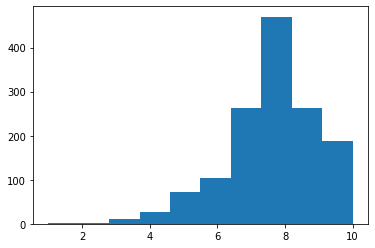

In [98]:
import matplotlib.pyplot as plt
plt.hist(final_df['Quality of Life'])

(array([123.,  87.,  99.,   0., 108.,  94.,   0., 103., 101., 686.]),
 array([ 5000., 12000., 19000., 26000., 33000., 40000., 47000., 54000.,
        61000., 68000., 75000.]),
 <BarContainer object of 10 artists>)

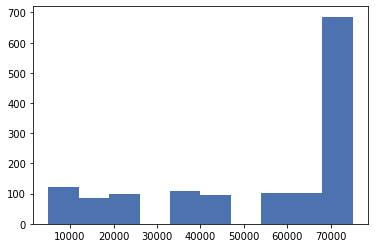

In [102]:
plt.hist(final_df['Income'])

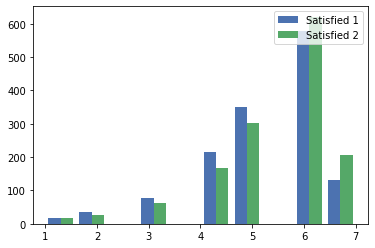

In [99]:
plt.style.use('seaborn-deep')

x = final_df['Satisfied With Life 1']
y = final_df['Satisfied With Life 2']

plt.hist([x, y], label=['Satisfied 1', 'Satisfied 2'])
plt.legend(loc='upper right')
plt.show()

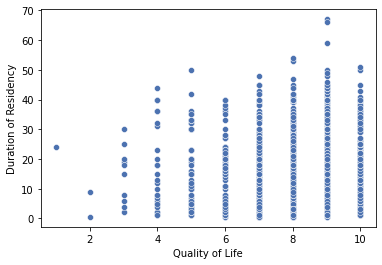

In [101]:
import seaborn as sns
sns.scatterplot(x="Quality of Life", y="Duration of Residency", data=final_df);

In [121]:
import plotly_express as px

fig1 = px.scatter(ethnicity_df, x="Income", y="Duration of Residency", 
                  color="Ethnicity", # the variable that specifies the number of colors to use
                  size="Quality of Life") # the size of each bubble in the plot
fig1.show()

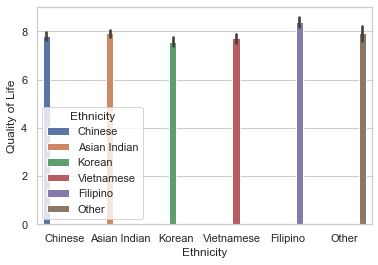

In [126]:
sns.set_theme(style="whitegrid")
fig = sns.barplot(x="Ethnicity", y="Quality of Life", 
                  data=ethnicity_df, hue="Ethnicity")